In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel(r"D:\Flight_Price_resources/Data_Train.xlsx")

In [3]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()     # checking missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# we can see there is only one missing value in each of two rows "Route" and "Total_Stops". So we will drop those.

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
# memory usage of the data
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [12]:
data=train_data.copy()

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# Extracting derived attributes from "Date_of_Journey" column

In [15]:
def changeinto_Datetime(col):
    data[col]=pd.to_datetime(data[col]) # to convert all time or date related columns to datetime column from object column

In [16]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [17]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    changeinto_Datetime(feature)                                   # convert to datetime64[ns] data type

In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
data["Journey_day"]=data['Date_of_Journey'].dt.day               # to retrieve only days from the datatime datatype column

In [20]:
data["Journey_month"]=data['Date_of_Journey'].dt.month          
data["Journey_year"]=data['Date_of_Journey'].dt.year

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-03 05:50:00,2024-03-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-03-03 18:05:00,2024-03-03 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-03-03 16:50:00,2024-03-03 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [22]:
def extract_hour_min(df,col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    return df
    

In [23]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-03 05:50:00,2024-03-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-03-03 18:05:00,2024-03-03 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-03-03 16:50:00,2024-03-03 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2024-03-03 19:55:00,2024-03-03 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-03-03 20:45:00,2024-03-03 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-03-03 08:20:00,2024-03-03 11:20:00,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2024-03-03 11:30:00,2024-03-03 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019,14,10


In [24]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-03 05:50:00,2024-03-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-03-03 18:05:00,2024-03-03 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-03-03 16:50:00,2024-03-03 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2024-03-03 19:55:00,2024-03-03 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019,22,25,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-03-03 20:45:00,2024-03-03 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-03-03 08:20:00,2024-03-03 11:20:00,3h,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2024-03-03 11:30:00,2024-03-03 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019,14,10,11,30


In [25]:
cols_to_drop=["Arrival_Time","Dep_Time"]
data.drop(cols_to_drop,axis=1,inplace=True)

In [26]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50


In [27]:
data.shape

(10682, 16)

In [28]:
# Lets analyze when will most of the flights take off. 

In [29]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else: return "Late Night"

In [30]:
data["Dep_Time_hour"].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [31]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

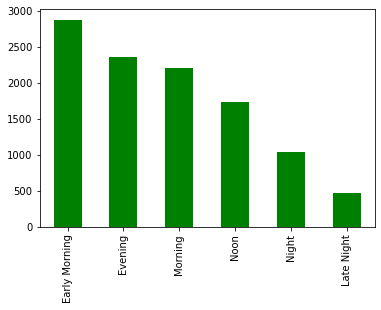

In [32]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar",color='g')

In [33]:
!pip install plotly
!pip install chart_studio

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [35]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [36]:
# Processing in "Duration" feature

In [37]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h'+ ' ' +x
    elif 'm' not in x:
        x=x+ ' ' +'0m'
    return x    

In [38]:
data["Duration"].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [39]:
data["Duration"]=data["Duration"].apply(preprocess_duration)

In [40]:
'2h 50m'.split(" ")

['2h', '50m']

In [41]:
'2h 50m'.split(" ")[0]

'2h'

In [42]:
'2h 50m'.split(" ")[0][0]

'2'

In [43]:
int('2h 50m'.split(" ")[0][0:-1])

2

In [44]:
data["Duration_hours"]=data["Duration"].apply(lambda x:int(x.split(" ")[0][0:-1]))

In [45]:
data["Duration_mins"]=data["Duration"].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [46]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50,4,45


In [47]:
# Lets analyze Duration  impacts on Price or not

In [48]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [49]:
eval('2*60')

120

In [50]:
data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval) 
# This line is converting hours to minites . ex:2h 50m=2*160+50=170

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [51]:
data["Duration_total_mins"]=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval) 

In [52]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

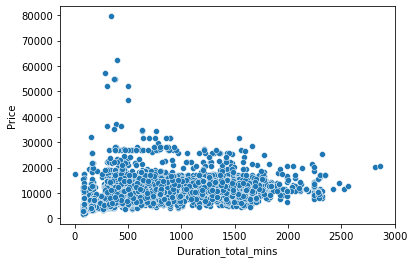

In [53]:
sns.scatterplot(x='Duration_total_mins',y='Price',data=data)

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

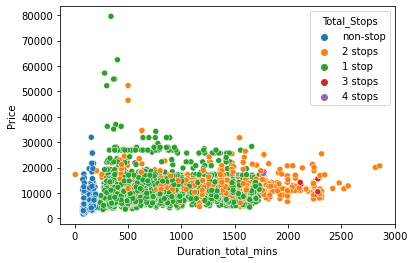

In [54]:
sns.scatterplot(x='Duration_total_mins',y='Price',hue='Total_Stops',data=data)

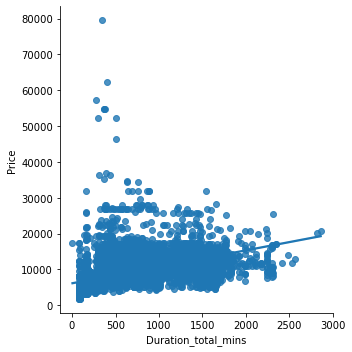

In [55]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)   # Regression plot

In [56]:
# On which route Jet airways is extremely used

In [57]:
data[data['Airline']=='Jet Airways'].head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0,1140
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,10,25,18,55,15,30,930
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,5,5,8,0,21,5,1265
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,10,25,8,55,25,30,1530
13,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,9,20,21,10,12,10,730


In [58]:
data[data['Airline']=='Jet Airways'].groupby('Route').count()
                                            

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [59]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)
             # Jet airways extremely used CCU → BOM → BLR route

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [60]:
# Airline vs Price analysis

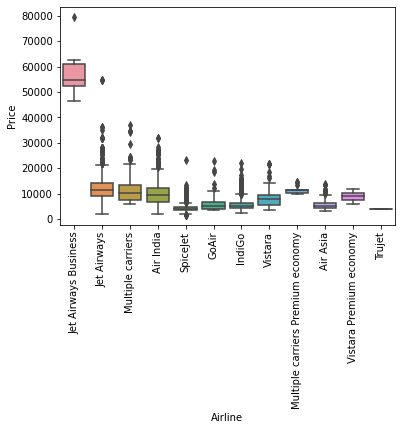

In [61]:
sns.boxplot(y='Price',x='Airline',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# Applying One hot encoding to the nominal data

In [63]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [64]:
[col for col in data.columns if data[col].dtypes=='object']    # columns of object data type 

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [65]:
cat_col=[col for col in data.columns if data[col].dtypes=='object']

In [66]:
num_col=[col for col in data.columns if data[col].dtypes!='object']

In [67]:
data['Source'].unique()      # all the sources

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [68]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [69]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category]=data['Source'].apply(lambda x:1 if x==sub_category else 0)

In [70]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,9,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,18,5,5,25,325,0,1,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,16,50,4,45,285,1,0,0,0,0


In [71]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [72]:
# Feature encoding on 'Airline' feature by using the target feature 'Price'

In [73]:
data.groupby(['Airline'])['Price'].mean().sort_values()   # every airline with their mean prices

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [74]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [75]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [76]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}   

In [77]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [78]:
data['Airline'].map(dict_airlines)

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [79]:
data['Airline']=data['Airline'].map(dict_airlines)
# so we converted all the airlines to a numeric level with respect to price

In [80]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,16,50,4,45,285,1,0,0,0,0


In [81]:
data['Destination']

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10682, dtype: object

In [82]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)  

In [83]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [84]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [85]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [86]:
dict_dest={key:index for index,key in enumerate(dest,0)}   

In [87]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [88]:
data['Destination']=data['Destination'].map(dict_dest)  
# so we converted all the destination place to a numeric level with respect to price

In [89]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,16,50,4,45,285,1,0,0,0,0


In [90]:
# Manual encoding on data

In [91]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [92]:
stop={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [93]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [94]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [95]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_mins', 'Duration_total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [96]:
data['Additional_Info']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [97]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [98]:
(data['Additional_Info'].value_counts())/len(data)*100   # approximately 78% of data has no information

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [99]:
data['Journey_year'].unique()  
# it is constant accross this feature. Will not make any impact to machine learning algorithms

array([2019], dtype=int64)

In [100]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year','Duration','Route'],inplace=True)  
# we already have extracted Journey_day,Journey_month,Journey_year from 'Date_of_Journey' column. So we will drop
# 'Date_of_Journey' column.For the same reason we also drop 'Source','Duration' and 'Duration_total_mins' columns.
#'Additional_Info','Route' columns also does not make any impact here.

In [101]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hours', 'Duration_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [102]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,23,30,18,5,5,25,0,1,0,0,0
4,3,2,1,13302,3,1,21,35,16,50,4,45,1,0,0,0,0


In [103]:
# Finding outliers by visualization

In [104]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

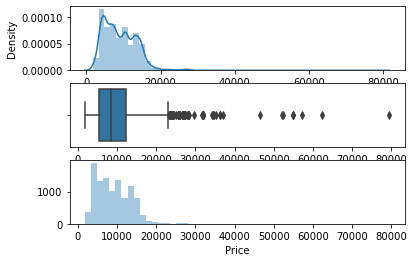

In [105]:
plot(data,'Price')   # we can detect outliers by seeing these distribution plot,box plot and Histogram plot

In [106]:
q1=data['Price'].quantile(0.25)   # 25 percentile
q3=data['Price'].quantile(0.75)  # 75 percentile

In [107]:
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr

In [108]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [109]:
l=[]
for price in data['Price']:
    if price>maximum or price<minimum:
        l.append(price)
        
print(l)        # these are the outliers in 'Price' feature

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [110]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])
# let's say domain experty told to replace the values with median if value >=35000

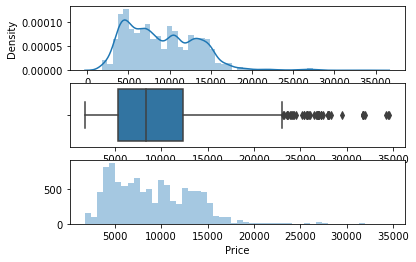

In [111]:
plot(data,'Price')   # now we have less number of outlers

In [112]:
# Performing feature selection

In [113]:
X=data.drop(['Price'],axis=1)      # independent variables

In [114]:
y=data['Price']   # Target variable  or dependent variable

In [115]:
from sklearn.feature_selection import mutual_info_regression

In [116]:
imp=mutual_info_regression(X,y)

In [117]:
imp                        # mutual information between each independent column and dependent variable
                           

array([0.98231864, 1.00757428, 0.79238288, 0.19263283, 0.24728665,
       0.41508886, 0.34877004, 0.33624307, 0.26203154, 0.47767106,
       0.34333561, 0.39958481, 0.45698917, 0.51718997, 0.13725985,
       0.20116535])

In [118]:
pd.DataFrame(imp,index=X.columns)

,0
Airline,0.982319
Destination,1.007574
Total_Stops,0.792383
Journey_day,0.192633
Journey_month,0.247287
Arrival_Time_hour,0.415089
Arrival_Time_minute,0.348770
Dep_Time_hour,0.336243
Dep_Time_minute,0.262032
Duration_hours,0.477671


In [119]:
imp_df=pd.DataFrame(imp,index=X.columns)

In [120]:
imp_df.columns=['importance']

In [121]:
imp_df

,importance
Airline,0.982319
Destination,1.007574
Total_Stops,0.792383
Journey_day,0.192633
Journey_month,0.247287
Arrival_Time_hour,0.415089
Arrival_Time_minute,0.348770
Dep_Time_hour,0.336243
Dep_Time_minute,0.262032
Duration_hours,0.477671


In [122]:
imp_df.sort_values(by='importance',ascending=False)
# Since here every feature have their own importance so make no sense to remove any feature 

,importance
Destination,1.007574
Airline,0.982319
Total_Stops,0.792383
Source_Delhi,0.517190
Duration_hours,0.477671
Source_Kolkata,0.456989
Arrival_Time_hour,0.415089
Source_Banglore,0.399585
Arrival_Time_minute,0.348770
Duration_mins,0.343336


In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
ml_model=RandomForestRegressor()

In [127]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [128]:
y_pred=ml_model.predict(X_test)

In [129]:
y_pred

array([11494.12466667, 11266.66949603, 11121.02      , ...,
       17643.25      ,  7545.03      ,  5069.463     ])

In [130]:
from sklearn.metrics import r2_score

In [131]:
r2_score(y_pred,y_test)      # this is accuracy i.e. how well the model is  performing

0.7725706764323582

In [132]:
import pickle

In [133]:
file=open(r'D:\ML projects/rf_random.pkl','wb')   # In this path D:\ML projects i am making one .pkl extension file

In [134]:
pickle.dump(ml_model,file)   # now dumping our model to the file

In [135]:
model=open(r'D:\ML projects/rf_random.pkl','rb')  # now i am going to open the file to read mode

In [136]:
forest=pickle.load(model)      # loading the model

In [137]:
y_pred2=forest.predict(X_test)

In [138]:
y_pred2

array([11494.12466667, 11266.66949603, 11121.02      , ...,
       17643.25      ,  7545.03      ,  5069.463     ])

In [139]:
r2_score(y_pred2,y_test)   # Accuracy score is same as what we got before

0.7725706764323582

In [140]:
# How to define our own evaluation  metric

In [141]:
def mape(y_true,y_pred):                     # mean absolute percentage error
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [142]:
mape(y_test,y_pred)

13.37662066911923

In [143]:
# automate machine learning pipeline

In [144]:
    
from sklearn import metrics

In [145]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training Score:{}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are:{}'.format(y_prediction))
    print("\n")
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score:{}'.format(r2_score))
    print('MAE:{}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('MSE:{}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('RMSE:{}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print('MAPE:{}'.format(mape(y_test,y_prediction)))
    sns.displot(y_test-y_prediction)

Training Score:0.9515653965948636
Predictions are:[11513.12433333 10958.40711905 10876.52       ... 16839.71
  7628.82        5002.876     ]


r2 score:0.8082773854002145
MAE:1189.6917103219175
MSE:3650901.864806023
RMSE:1910.7333316834201
MAPE:13.200091892516996


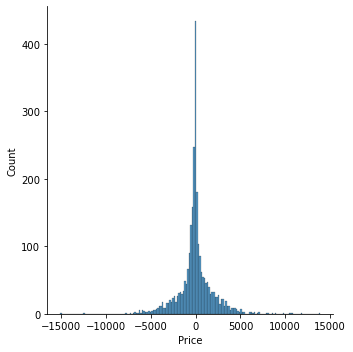

In [146]:
predict(RandomForestRegressor())
# From the graph we can say for most of the data points the error is approximately zero.

In [147]:
from sklearn.tree import DecisionTreeRegressor

Training Score:0.9683472475024685
Predictions are:[14231. 10368. 10197. ... 19685.  6442.  4107.]


r2 score:0.6762243890385558
MAE:1383.8781480094844
MSE:6165537.562198304
RMSE:2483.0500522942148
MAPE:15.194241245291797


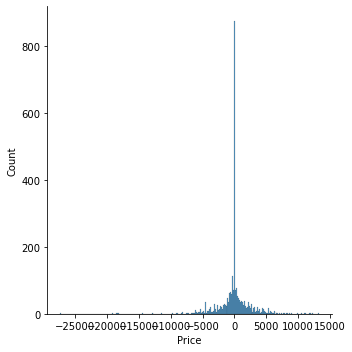

In [148]:
predict(DecisionTreeRegressor())   # By Random forest we get more accuracy than by decision tree

In [149]:
# Hypertuning ML model

In [150]:
from sklearn.model_selection import RandomizedSearchCV

In [151]:
reg_rf=RandomForestRegressor()

In [152]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [161]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]   # no. of trees in Random forest
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [162]:
random_grid={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth'    : max_depth,
    'min_samples_split' : min_samples_split
}

In [163]:
random_grid      # Hyperparameter space

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [164]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [165]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [166]:
# best parameters
rf_random.best_params_               # these are optimized values of the parameters for the random forest algorithm

{'n_estimators': 980,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [167]:
rf_random.best_estimator_                   # this is the best optimized model

RandomForestRegressor(max_depth=13, min_samples_split=15, n_estimators=980)

In [168]:
rf_random.best_score_              # so using the above optimized model we get 81% accuracy

0.8168735115848756